In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import pandasql as pds
import matplotlib.pyplot as plt

In [2]:
vgs=pd.read_csv("C:\\Users\\Aviel\\Python\\datasets\\VideoGameSales.csv")

This dataset provides comprehensive sales information for video games in the years 1980-2020
across different platforms, genres, and regions.
It includes data on global sales as well as sales by individual regions
such as North America, Europe, and Japan. This dataset is valuable for analyzing trends 
in the video game industry, understanding the performance of different games across various regions, 
and identifying key factors that influence video game sales.

In [3]:
vgs

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [4]:
vgs.shape

(16598, 11)

Returns the dimensions of the Data Frame - number of rows and columns.

In [5]:
vgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Provides a brief summary of the Data Frame.

In [6]:
vgs.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Provides a summary of statistical metrics for each column in the Data Frame.

In [7]:
vgs.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Summarize the missing values in the Data Frame for each column.

In [8]:
vgs=vgs.drop('Other_Sales',axis=1)

The Other_Sales column has been removed from the dataset as it is not relevant to the current analysis.
The focus will be on comparing sales across the regions of North America, Europe, and Japan.

In [9]:
vgs.dropna(subset=['Year','Publisher'],inplace=True)

To ensure the accuracy of the analysis, I have removed rows from the dataset where there are missing values in the Year and Publisher columns.

In [10]:
vgs['Rank']=vgs['Rank'].astype('int32')

I converted the Rank column to int 32 to optimize memory usage and efficiency,
as the values fit within the range of 32-bit integers.

In [11]:
vgs['Year'] = pd.to_datetime(vgs['Year'],format='%Y')
vgs['Year']=vgs['Year'].dt.strftime('%Y')

I converted the Year column from its previous numeric format to a datetime format and then reformatted it to display only the year correcting any inconsistencies in the date information.

In [12]:
vgs['NA_Sales']=vgs['NA_Sales']*1_000_000
vgs['EU_Sales']=vgs['EU_Sales']*1_000_000
vgs['JP_Sales']=vgs['JP_Sales']*1_000_000
vgs['Global_Sales']=vgs['Global_Sales']*1_000_000

To present the sales figures more clearly and avoid confusion, I converted the sales values by multiplying them by 1,000,000. This adjustment ensures that the sales figures are displayed in their full numerical form, reducing potential misunderstandings.

In [13]:
vgs['NA_Sales']=vgs['NA_Sales'].astype('int64')
vgs['EU_Sales']=vgs['EU_Sales'].astype('int64')
vgs['JP_Sales']=vgs['JP_Sales'].astype('int64')
vgs['Global_Sales']=vgs['Global_Sales'].astype('int64')

I converted the sales columns to integers to eliminate the decimal parts, as they are not necessary for this analysis. This phrasing emphasizes clarity and relevance.

In [14]:
top_game=vgs.loc[vgs['Global_Sales'].idxmax()]
print(f"The game with the highest total sales is '{top_game['Name']}' with total sales of {top_game['Global_Sales']:,.0f}")

The game with the highest total sales is 'Wii Sports' with total sales of 82,740,000


Displays the game with the highest total global sales through the years.

In [15]:
low_year=vgs.groupby('Year')['Global_Sales'].sum().idxmin()
low_year_sales=vgs.groupby('Year')['Global_Sales'].sum().min()
print(f"The year with the lowest total sales is {low_year} with total sales of {low_year_sales:,.0f}")

The year with the lowest total sales is 2017 with total sales of 50,000


Displays the year with the lowest total global sales.

In [16]:
avg_na_sales=vgs['NA_Sales'].mean()
print(f"Average sales in NA region is: {avg_na_sales:,.0f} Million")

Average sales in NA region is: 265,647 Million


Displays the average sales for video games in the NA region.

In [17]:
med_eu_sales=vgs['EU_Sales'].median()
print(f"Median sales in EU region is: {med_eu_sales:,.0f} Million")

Median sales in EU region is: 20,000 Million


Displays the median sales for video games in the EU region.

In [18]:
std_jp_sales=vgs['JP_Sales'].std()
print(f"Standard deviation sales in Japan is: {std_jp_sales:,.0f} Million")

Standard deviation sales in Japan is: 311,879 Million


Displays the Standard deviation sales for video games in Japan.

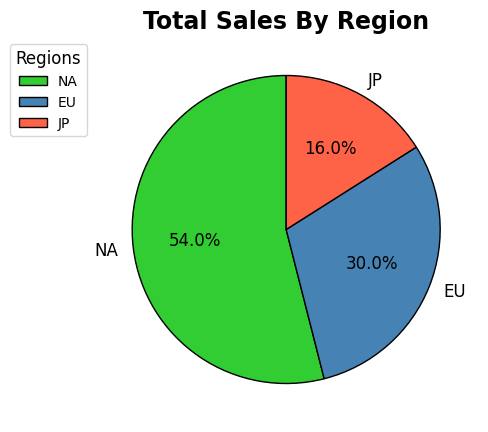

In [19]:
region_sales={'NA':vgs['NA_Sales'].sum(),'EU':vgs['EU_Sales'].sum(),'JP':vgs['JP_Sales'].sum()}
# summarize the total sales in each region.
colors=['#32CD32','#4682B4','#FF6347']
# creating a list of colors in hexadecimal code.
plt.figure(figsize=(5,5))
# set up the size for the plot.
plt.pie(region_sales.values(),labels=region_sales.keys(),autopct='%1.1f%%',startangle=90,colors=colors,wedgeprops=dict(edgecolor='black'),textprops={'fontsize':12})
# creating a pie chart with percentage, labels, colors, black border, font size and rotates to 90 degrees.
plt.legend(labels=region_sales.keys(),title="Regions",loc="best",fontsize=10,title_fontsize='12',bbox_to_anchor=(0,1))
# creating a legend for the plot with labal and title font size and adjusting the position. 
plt.title('Total Sales By Region',fontsize=17,fontweight='bold')
# making a title for the plot.
plt.show()
# displays the plot. 

Business Insight: The pie chart shows that North America is the largest and most profitable market, making 54% of total sales. This shows that it is the most important market for generating revenue. To make the most of this opportunity, it would be wise to focus marketing and development efforts on this region to boost profitability even further.

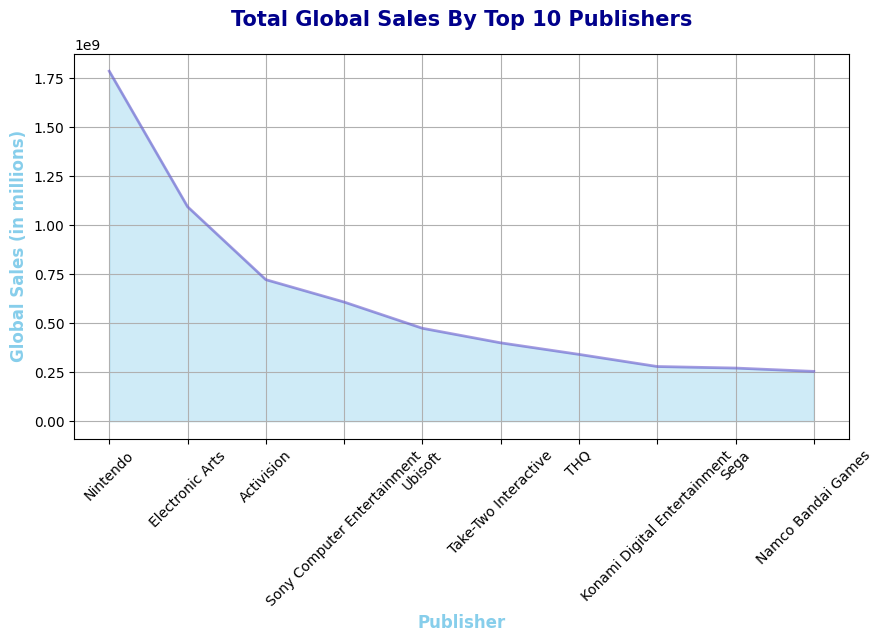

In [20]:
pub_sales=vgs.groupby('Publisher')['Global_Sales'].sum().reset_index()
# calculates the sum of global sales for each publisher.
top_10_pub= pub_sales.sort_values(by='Global_Sales',ascending=False).head(10)
# finds the top 10 publishers by global sales.
plt.figure(figsize=(10,5))
# set up the size for the plot.
plt.fill_between(top_10_pub['Publisher'],top_10_pub['Global_Sales'],color="skyblue",alpha=0.4)
# sets the fill color to a light blue and adjusts the transparency of the fill color to 40%.
plt.plot(top_10_pub['Publisher'],top_10_pub['Global_Sales'],color="Slateblue",alpha=0.6,linewidth=2)
# creating an area chart in blue color transparency 60% and thickness of the line to 2.
plt.xlabel('Publisher',fontsize=12,fontweight='bold',color='skyblue')
# making a label for the x-axis with font size, style and color.
plt.ylabel('Global Sales (in millions)',fontsize=12,fontweight='bold',color='skyblue')
# # making a label for the y-axis with font size, style and color.
plt.title('Total Global Sales By Top 10 Publishers',fontsize=15,fontweight='bold',color='darkblue',pad=20)
# making a title for the plot with distance of 20 points between the title and the plot.
plt.xticks(rotation=45)
# rotates the x-axis tick labels by 45 degrees for easier read.
plt.grid(True)
# adds a grid to the plot.
plt.show()
# displays the plot. 

Business Insight: The area chart shows which publishers are the top 10 earners in the video game industry. We can see that Nintendo is the number one publisher, it suggests that Nintendo is a major player in the global video game market. Game development studios that are looking to maximize their profit, partnering with a leading publisher like Nintendo could be a strategic move. This partnership could provide better market access and higher sales potential due to the publisher's established reputation and distribution channels.

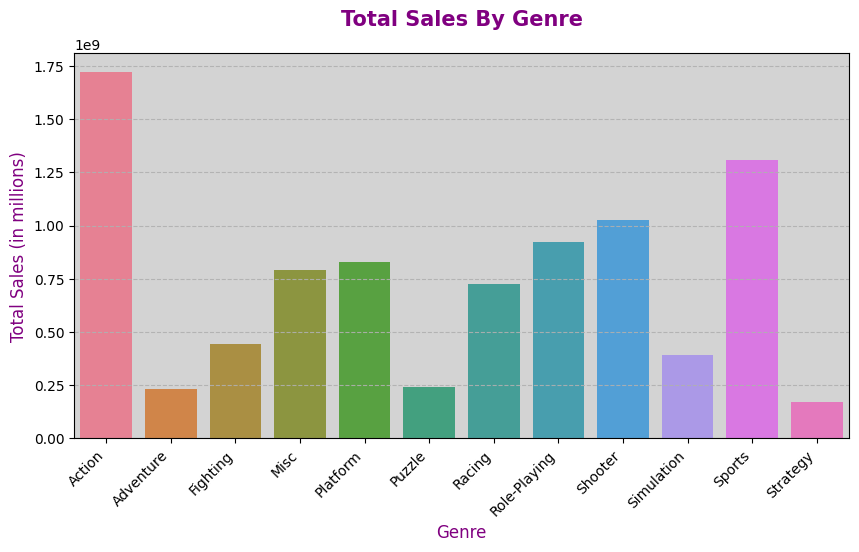

In [21]:
genre_sales=vgs.groupby('Genre')['Global_Sales'].sum().reset_index()
# # calculates the sum of global sales by genre.
plt.figure(figsize=(10,5))
# set up the size for the plot.
sb.barplot(x='Genre',y='Global_Sales',data=genre_sales,hue='Genre',palette='husl',legend=False)
# creating a bar chart with color differentiation based on the genre.
plt.xlabel('Genre',fontsize=12,color='purple')
# # making a label for the x-axis with font size and color.
plt.ylabel('Total Sales (in millions)',fontsize=12,color='purple')
# # making a label for the y-axis with font size and color.
plt.title('Total Sales By Genre',fontsize=15,fontweight='bold',color='purple',pad=20)
# making a title for the plot with distance of 20 points between the title and the plot.
plt.xticks(rotation=45,ha='right')
# rotates and aligns the x-axis labels for easy read. 
plt.gca().set_facecolor('lightgray')
# changing the background of the plot to gray for contrast.
plt.grid(axis='y',linestyle='--',alpha=0.9)
# customize the grid lines of the plot style and transparency.
plt.show()
# displays the plot. 

Business Insight: The bar chart shows that Action is the most popular game genre among players. This high level of popularity suggests that there is significant demand for action games. Investing in the development and marketing of action games could be a strategic move, as focusing on this genre might lead to higher sales and greater profitability. By capitalizing on the current trends and player preferences, the company can better align their offerings with market demand.

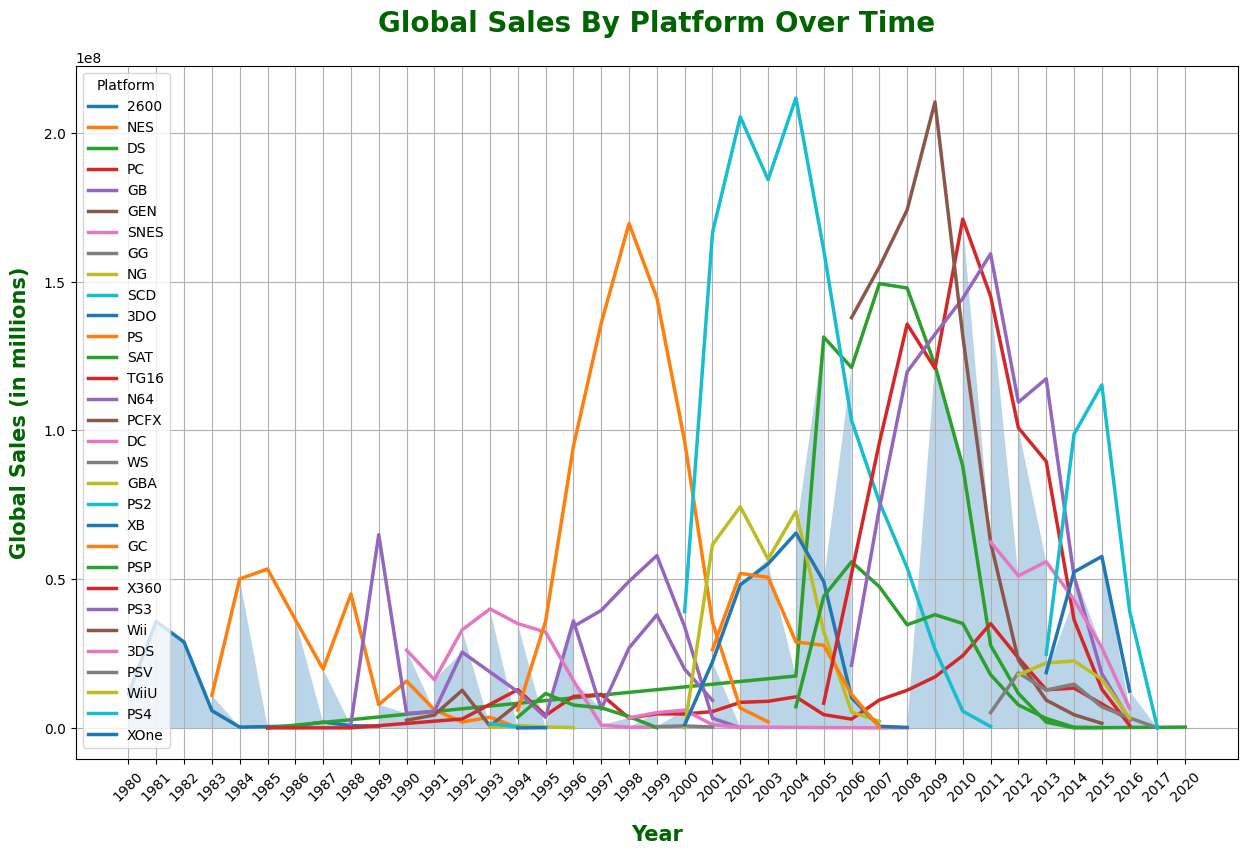

In [22]:
plat_year_sales=vgs.groupby(['Year','Platform'])['Global_Sales'].sum().reset_index()
# calculates the sum of global sales by platform for each year.
plt.figure(figsize=(15,9))
# set up the size for the plot.
sb.lineplot(x='Year',y='Global_Sales',hue='Platform',data=plat_year_sales,palette='tab10',linewidth=2.5)
# creating a line chart with thickness of 2.5.
plt.fill_between(plat_year_sales['Year'],plat_year_sales['Global_Sales'],alpha=0.3)
# creates a shaded area under the curve of the sales.
plt.xlabel('Year',fontsize=15,fontweight='bold',color='darkgreen',labelpad=15)
# making a label for the x-axis with font size, style, color and distance.
plt.ylabel('Global Sales (in millions)',fontsize=15,fontweight='bold',color='darkgreen',labelpad=10)
# making a label for the y-axis with font size, style, color and distance.
plt.title('Global Sales By Platform Over Time',fontsize=20,fontweight='bold',color='darkgreen',pad=25)
# making a title for the plot with distance of 25 points between the title and the plot.
plt.xticks(rotation=45)
# rotates the x-axis labels for easy read. 
plt.grid(True)
# adds a grid to the plot.
plt.legend(title='Platform')
# creating a legend for the plot with a title. 
plt.show()
# displays the plot. 

Business Insight: The line chart show how global sales for different gaming platforms have evolved over time. In the years 1980-1983 the 'Atari2600' console was the most popular in terms of game sales. However, this is no longer relevant today and companies should avoid investing in games for this platform. From 2017 onwards the dominant console in the market is the 'PS4' Therefore companies should focus on creating games for this platform to maximize profits.

In [ ]:
""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

In Conclusion, a game development studio should create games designed for the NA region, as it represents the largest market with the highest profits. The studio should focus on developing action games which is the best-selling genre of all times. The games should be optimized for the most popular console - the PS4. Additionally, it is recommended to collaborate with a publisher such as Nintendo which is the strongest player in the market.

In [ ]:
""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""